# What's New in Python 3.11 And Should You Even Bother With It?
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@markuswinkler?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Markus Winkler</a>
    </strong>
</figcaption>

## Introduction

## What are Python 3.11 features?

[Python 3.11 changelog](https://docs.python.org/3.11/whatsnew/changelog.html#changelog) shows a massive number of bug fixes, improvements and additions, most of which you will never use or even notice changed. However, there are a few critical new features that might significantly improve your Python workflow when the stable release comes. I will be outlining them here. 

### 1. Speed improvement

The first major news everyone is excited about is the speed improvement. However, don't get your hopes up too much as the new speed is only about 25% higher than 3.10. The Python docs claim it can be up to 60% in certain cases. Let's test how much of these claims are true. 

To compare the speeds of Python 3.10 and 3.11, you will need a [docker installation](https://www.docker.com/). After making sure Docker desktop is running, run these two commands in the terminal, which will download two images for the two versions of Python.

```bash
$ docker run -d python:3.10.4-bullseye

$ docker run -d python:3.11-rc-bullseye
```

The downloaded images should be visible in your Docker dashboard, where you can also fire them up:

![](images/docker_images_2.gif)

After you launch the containers, you can run `docker ps` to see details like ID, name and status:

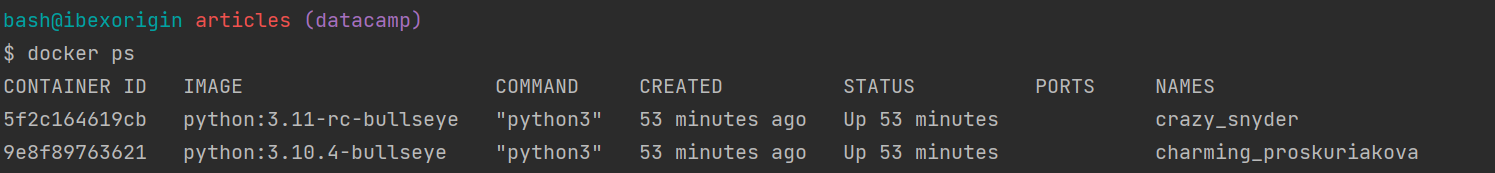

The running containers are also visible under the Containers tab in your dashboard, where you will also find CLI buttons next to "Run/Stop". Click them for both containers to launch two terminal tabs attached to the containers.

In both tabs, install the `pyperformance` package via pip. `pyperformance` is a useful library to run benchmark tests for different Python versions. 

After the installation, run the below commands in each container terminals.

For Python 3.10:

```bash
$ pyperformance run -r -o py310.json
```

For Python 3.11:

```bash
$ pyperformance run -r -o py311.json
```

These commands will run benchmark tests for about 60 Python functions from standard libraries and produce JSON metadata. I've optionally added the `-r` tag to tell `pyperformance` I want the tests to be rigorous, which takes more time.

> Both containers are running on a Windows machine with AMD Ryzen 12-core CPU. 

Now, we have two JSON files in two containers. We will need to put both in a single directory to continue the speed test. For that, we will use the `docker cp` command to copy the JSON file from Python 3.11 container to 3.10. 

Run the below commands in a separate terminal tab:

```bash
$ docker cp crazy_snyder:/py311.json C:/Users/bex/Desktop

$ docker cp C:/Users/bex/Desktop/py311.json charming_proskuriakova:/
```

> `crazy_snyder` and `charming_proskuriakova` are the IDs of the running containers.

Now, both JSON files are in the Python 3.10 container. To complete the benchmark and save the results as a CSV, run the below commands:

```bash
$ pyperformance compare py310.json py311.json --csv comparison.csv

$ docker cp charming_proskuriakova:/comparison.csv C:/Users/bex/Desktop/articles
```

Finally, let's load the CSV into Pandas and analyze it:

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("data/comparison.csv")
df.rename(
    {"Base": "py310", "Changed": "py311", "Benchmark": "function"},
    axis=1,
    inplace=True,
)

df.shape

(59, 3)

In [19]:
df.sample(5)

,function,py310,py311
40,scimark_monte_carlo,0.12392,0.08052
19,mako,0.01967,0.01289
1,chameleon,0.01131,0.00843
8,float,0.14265,0.09133
35,regex_effbot,0.00315,0.00261


Each row in the dataframe records how much time it took (in milliseconds) for both versions to run the given Python function. 

Let's plot a histogram of speedups:

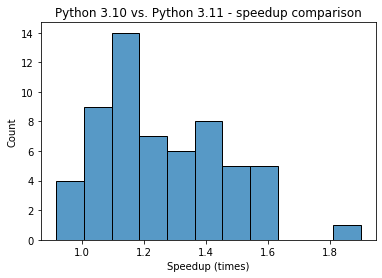

In [24]:
df["speed_up"] = (df["py310"] / df["py311"]).round(3)

fig, ax = plt.subplots()

sns.histplot(df["speed_up"], bins=11)
ax.set(
    xlabel="Speedup (times)", title="Python 3.10 vs. Python 3.11 - speedup comparison"
)

plt.show();

It is clear from the plot that the majority of functions in Python 3.11 were about 1.2 times faster. We can also confirm the estimate with the mean and median:

In [21]:
df["speed_up"].mean()

1.2605593220338982

In [5]:
df["speed_up"].median()

1.207

It seems there is one case where the speedup was ~1.9:

In [6]:
df["speed_up"].max()

1.899

There are also four cases where Python 3.10 was faster than the new version:

In [26]:
(df["speed_up"] <= 1).sum()

4

### 2. Better error messages

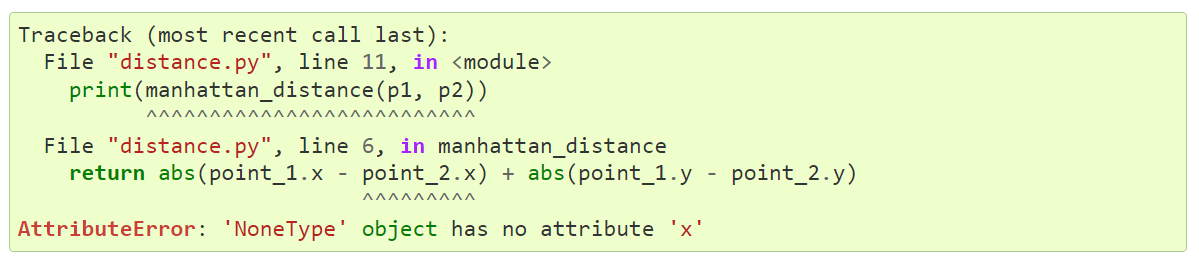

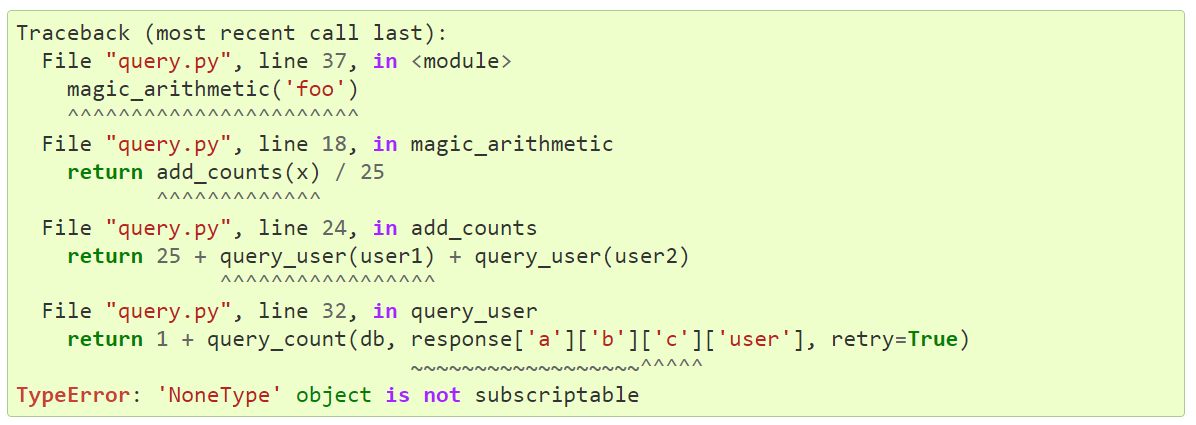

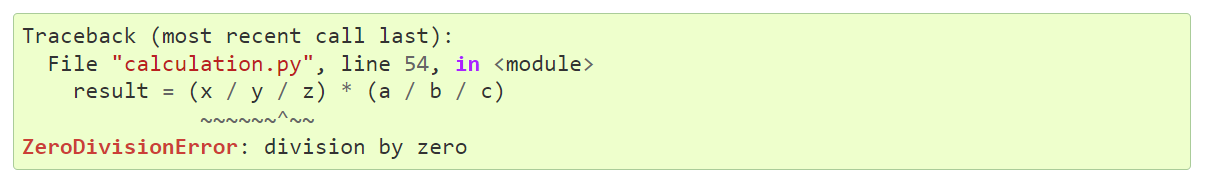

### 3. Multiple except clauses with `except*`

```python
try:
    raise ValueError("Oops!")
except* ValueError:
    ...
    raise
except* TypeError:
    ...
    raise
except* RuntimeError:
    ...
    raise
```

![](images/exceptions.gif)

### 4. Exception notes

```python
import math

try:
    math.sqrt(-1)
except ValueError as e:
    e.add_note("Negative value passed! Please try again.")
    raise
```

![](images/error.gif)

```python
import math


class MyOwnError(Exception):
    # Should be a list of strings
    __notes__ = ["This is a custom error!"]


try:
    math.sqrt(-1)
except:
    raise MyOwnError
```
![](images/error_class.gif)

### 5. New typing feature: Self

```python
from typing import Self


class Language:

    def __init__(self, name, version, release_date):
        self.name = name
        self.version = version
        self.release_date = release_date

    def change_version(self, version) -> Self:
        self.version = version

        return None
```
![](images/self.gif)

### 6. Improvements to built-in modules

## When will Python 3.11 be released? 